In [1]:
%load_ext autoreload
%autoreload 2

In [43]:
from evar.workflow import EvarWorkflow, make_kfold_splits
import evar.estimator_var as estimator_var
from evar.data import COLUMN_NAMES
from evar.viz import plot_bin_pred_hist
import numpy as np
import pandas as pd

In [44]:
estimator_var.INTERVALS_INFO_FOMAT = '{0:.5f}'

In [49]:
flow = EvarWorkflow()
flow.make_estimator_var()
var_data = flow.comp_var_data(n_splits=4, prob_bins=7)


v.3


In [50]:
var_data

,p_binid,y_score,p_estim,mean_score,bin_interval,p_pred_id,y_test
0,2,0.927701,0.722222,0.818383,"[0.45943, 0.98653]",0,1
1,0,0.000419,0.000000,0.000200,"[0.00000, 0.00134]",0,0
2,1,0.011196,0.000000,0.085257,"[0.00134, 0.45943]",0,0
3,3,0.997265,1.000000,0.993377,"[0.98653, 0.99851]",0,1
4,5,0.999752,1.000000,0.999850,"[0.99970, 0.99995]",0,1
...,...,...,...,...,...,...,...
183,1,0.028219,0.000000,0.081325,"[0.00528, 0.44321]",3,0
184,0,0.001090,0.000000,0.000488,"[0.00000, 0.00528]",3,0
185,1,0.043889,0.000000,0.081325,"[0.00528, 0.44321]",3,0
186,2,0.486310,0.722222,0.825277,"[0.44321, 0.96563]",3,1


In [51]:
var_data[var_data[COLUMN_NAMES.binid] == 0]

,p_binid,y_score,p_estim,mean_score,bin_interval,p_pred_id,y_test
1,0,4.191880e-04,0.0,0.000200,"[0.00000, 0.00134]",0,0
5,0,1.149192e-10,0.0,0.000200,"[0.00000, 0.00134]",0,0
6,0,8.137120e-08,0.0,0.000200,"[0.00000, 0.00134]",0,0
19,0,7.856360e-06,0.0,0.000200,"[0.00000, 0.00134]",0,0
22,0,1.755042e-08,0.0,0.000200,"[0.00000, 0.00134]",0,0
...,...,...,...,...,...,...,...
146,0,8.320080e-05,0.0,0.000488,"[0.00000, 0.00528]",3,0
147,0,1.425632e-05,0.0,0.000488,"[0.00000, 0.00528]",3,0
155,0,2.937627e-11,0.0,0.000488,"[0.00000, 0.00528]",3,0
156,0,3.777633e-04,0.0,0.000488,"[0.00000, 0.00528]",3,0


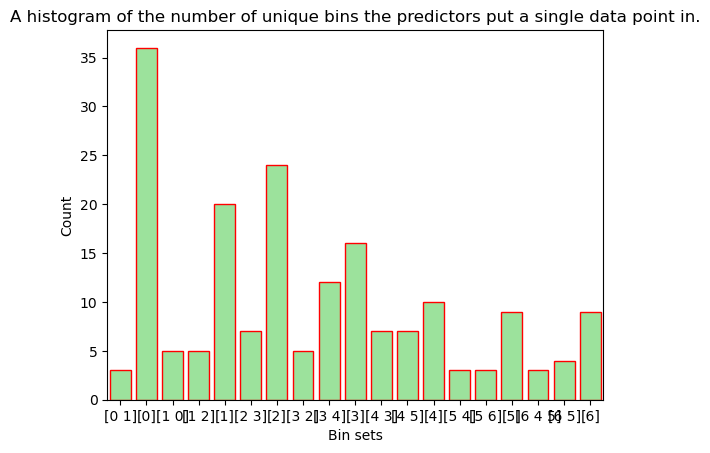

In [52]:
plot_bin_pred_hist(var_data)

In [14]:
df_binid_pred_id_groups = var_data.groupby(by=[COLUMN_NAMES.binid, COLUMN_NAMES.p_predid])[[COLUMN_NAMES.y_score, COLUMN_NAMES.p_estim, COLUMN_NAMES.y_test]].mean()

In [15]:
df_binid_pred_id_groups.loc[0, 0]

y_score    0.107187
p_estim    0.095238
y_test     0.120000
Name: (0, 0), dtype: float64

In [53]:
for i, cpp in enumerate(flow.evar.prob_predictors):
    print(cpp._calibrate._binid_prob_estim_map)

    p_estim  mean_score        bin_interval
0  0.000000    0.000200  [0.00000, 0.00134]
1  0.000000    0.085257  [0.00134, 0.45943]
2  0.722222    0.818383  [0.45943, 0.98653]
3  1.000000    0.993377  [0.98653, 0.99851]
4  1.000000    0.999247  [0.99851, 0.99970]
5  1.000000    0.999850  [0.99970, 0.99995]
6  1.000000    0.999980  [0.99995, 1.00000]
    p_estim  mean_score        bin_interval
0  0.000000    0.000614  [0.00000, 0.00400]
1  0.055556    0.106385  [0.00400, 0.42128]
2  0.722222    0.875913  [0.42128, 0.97862]
3  0.944444    0.991200  [0.97862, 0.99644]
4  1.000000    0.997914  [0.99644, 0.99926]
5  1.000000    0.999614  [0.99926, 0.99988]
6  1.000000    0.999940  [0.99988, 1.00000]
    p_estim  mean_score        bin_interval
0  0.000000    0.000576  [0.00000, 0.00786]
1  0.000000    0.132079  [0.00786, 0.46485]
2  0.722222    0.848745  [0.46485, 0.97359]
3  1.000000    0.987619  [0.97359, 0.99620]
4  1.000000    0.997752  [0.99620, 0.99883]
5  1.000000    0.999403  [0.9988